# Clustering with K-means

compétences: c1 c2 c3 c4 c5 c20 Keywords: Unsupervised Learning, Clustering, Kmeans.
Description

Découvrir l'apprentissage non-supervisé au travers de l'algorithme K-means.
Contexte

L'apprentissage supervisé ce présente comme une approche de l'apprentissage automatique qui permet de découvrir la structure sous-jacente des données en l'absence d'étiquetage, c'est à dire sans catégories ou classe connue en avance.

Afin de se familiariser avec cette approche et mieux l'appréhender pour l'utiliser dans des scénario plus complexe, les objectifs sont les suivants :

Nous souhaitons comprendre le principe de cette technique et les scénarios d'utilisation
Expérimenter et évaluer un algorithme de cet classe de problème d'apprentissage : les K-moyennes (ou K-means) sur un jeu de données simple.
Comprendre et comparer les métrique d'évaluation en jeux
tester sur des jeux précédemment utilisé de classification, la capacité de l'algorithme à retrouver les catégories de prédiction.

Question de veilles:

1-Qu'est ce que le clustering ? Est ce un probleme difficile ? pourquoi ?

2-Quelle est la compléxité d'un probléme de clustering ? 

3-Quelle sont les métrique utilisé pour le clustering ?
Ecriver en une phrase votre comprhéension pour chaque métrique découverte
séparer les métrique avec "ground truth" et "sans "ground truth".
différenc entre NMI et AMI ?

Ressources

    https://le-datascientist.fr/apprentissage-supervise-vs-non-supervise
    https://realpython.com/k-means-clustering-python/#writing-your-first-k-means-clustering-code-in-python
    (fr) https://mrmint.fr/algorithme-k-means
    https://scikit-learn.org/stable/modules/clustering.html#clustering
    https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Livrable

Un git par apprenant avec les éléments suivants:

Un notebook, résumant le travail

Modalité pédagogique

durée: 2 jours groupe: individuel

### 1-Qu'est ce que le clustering ? Est ce un probleme difficile ? pourquoi
le clustering est un processus qui partitionne un ensemble de données en sous-classes (clusters) ayant des similitude.
cela peu être un problème car nous sommes sur un apprentissage non supervisé, c'est a dire que les données d'entrée ne sont pas labélisées. On peut donc se demander à quel point les clusters trouvés sont bon, plusieurs essaie sont donc necessaire. 



### 2-Quelle est la compléxité d'un probléme de clustering ? 

Temps necessaire pour le calcul en fonction du nombre de données.
Trouver la solution optimale au problème de k-means clustering pour les observations en d dimensions.
formule pour le temps d'exécution de l'algorithme de Lloyd: O(nkdi) 

n est le nombre de d vecteurs -dimensionnels (à regrouper)

k le nombre de clusters

i le nombre d'itérations nécessaires jusqu'à la convergence. 


### 3-Quelle sont les métrique utilisé pour le clustering ?
Ecriver en une phrase votre comprhéension pour chaque métrique découverte
séparer les métrique avec "ground truth" et sans "ground truth".
différenc entre NMI et AMI ?

-metrics.homogeneity_score - 
Métrique d'homogénéité d'un cluster labélisé avec "ground truth".
Un résultat de clustering satisfait l'homogénéité si tous ses clusters contiennent uniquement des points de données appartenant à une seule classe. 


-metrics.completeness_score -
Mesure d'exhaustivité d'un cluster labélisé avec "ground truth". 
Un résultat de clustering satisfait l'exhaustivité si tous les points de données qui sont membres d'une classe donnée sont des éléments du même cluster.


-metrics.v_measure_score - 
Mesure en V de cluster labélisé  avec "ground truth". 
La v_measure_score est la moyenne harmonique entre l'homogénéité et l'exhaustivité.







-metrics.adjusted_rand_score -
L'adjusted_rand_score est ajusté au hasard. 
L'adjusted_rand_score calcule une mesure de similarité entre deux clusters en considérant toutes les paires d'échantillons et en comptant les paires qui sont affectés dans les mêmes clusters ou dans des clusters différents dans les regroupements. 


-metrics.adjusted_mutual_info_score - 
Ajustement des informations mutuelles entre deux clusters. 
L'adjusted_mutual_info_score (AMI) est un ajustement de la mutuelle Score d'information (IM) qui tient compte du hasard. Cela explique le fait que l'IM est généralement plus élevé pour deux clusters ayant un plus grand nombre de clusters, qu'il n'y ait , ou non, des informations partagées supplémentaire. 


-metrics.silhouette_score - 
Calcule le coefficient de silhouette moyen de tous les échantillons.
Le silhouette_score est calculé en utilisant la distance moyenne intra-cluster (distance a) et la moyenne du groupe le plus proche (b) pour chaque échantillon. Le silhouette_score a pour échantillon (b - a) / max(a, b). 
il calcul, la meilleur distance entre un échantillon et le cluster le plus proche dont l'échantillon ne fait pas partie.



Le NMI est souvent utilisé dans la littérature, alors que l'AMI est proposé et normalisé contre le hasard.


In [10]:
# Import 

import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
#from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [11]:
# Import des données
digits = load_digits()
# taille
print(digits.data.shape)

#matrice de 1797 images

(1797, 64)


In [14]:
features= digits.data

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [13]:
features[:3]
#chaque liste correspond a un nombre et chaque nombre dans la liste correspond a un pixel 
#(de 0 à 1( pour le niveau de gris))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [36]:
#normalisation, mise à léchelle de -2 à 2
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) 

In [37]:
scaled_features[:3]

array([[ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
        -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
        -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
        -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
         0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
         1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
        -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
        -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
         0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
         1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
        -0.36677122, -1.14664746, -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684,  0.03864775,  0.

In [56]:
#definition des parametres de Kmeans
kmeans = KMeans(
#init='k-means++', 
n_clusters=10,         #définit le nombre de regroupement
#n_init=10,
#max_iter=300,
#random_state=42
)

In [57]:
#ajuster aux données
kmeans.fit(scaled_features)

KMeans(n_clusters=10)

In [58]:
# la plus basse valeur de la somme de l'erreur quadratique
kmeans.inertia_

69417.31148910118

In [53]:
# Emplacements finaux du centre de gravité 
kmeans.cluster_centers_

array([[ 0.00000000e+00, -3.35016487e-01, -8.32563818e-01,
        -1.10806662e-01, -5.29473926e-01, -7.24130379e-01,
        -3.72550660e-01, -1.25022923e-01, -5.90775571e-02,
        -6.04668883e-01, -5.53562867e-01,  6.42358609e-01,
        -8.99709645e-01, -1.19790980e+00, -5.02455957e-01,
        -1.30433381e-01, -4.46250733e-02, -4.93518450e-01,
         4.93974448e-01,  3.75065677e-01, -1.02498670e+00,
        -1.24184709e+00, -5.48805463e-01, -1.14221844e-01,
        -3.33797263e-02,  1.14272803e-02,  7.52131035e-01,
        -1.68314552e-01, -9.86532433e-01, -9.47502154e-01,
        -5.99932757e-01, -4.72323823e-02,  0.00000000e+00,
         3.72298500e-01,  1.11706391e+00,  6.08914823e-01,
         3.48824826e-01,  3.24083335e-01, -1.72436411e-02,
         0.00000000e+00, -6.13436689e-02,  1.05711889e-01,
         1.16302320e+00,  5.05465493e-01, -3.88422496e-01,
         3.43260623e-01,  1.37509135e+00,  6.60881878e-01,
        -3.54332626e-02, -3.00591263e-01,  4.80627500e-0

In [46]:
#Le nombre d'itérations nécessaires pour converger 
kmeans.n_iter_

28

In [48]:
#targets connues
digits.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
#affectation des cluster , 20 premières étiquettes prédites
kmeans.labels_[:20]

array([4, 9, 9, 3, 5, 3, 0, 8, 3, 3, 4, 1, 7, 3, 5, 2, 0, 8, 9, 3],
      dtype=int32)

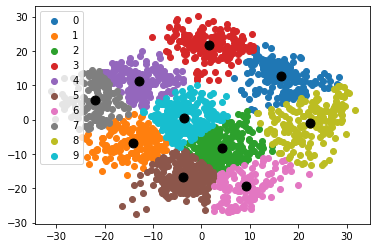

In [71]:
#centre de gravité et cluster répartie par couleur en fonction de chaque nombre
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(features)
label = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [16]:

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)


# digits: 10; # samples: 1797; # features 64


In [7]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # mise en page des résultats
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.182s	69485	0.613	0.660	0.636	0.482	0.632	0.171
random   	0.082s	69952	0.545	0.616	0.578	0.415	0.574	0.124
PCA-based	0.028s	72686	0.636	0.658	0.647	0.521	0.643	0.145
__________________________________________________________________________________
